<a href="https://colab.research.google.com/github/diksham1/image-lab/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Processing Lab Assignment

In [ ]:
import numpy as np; 
import matplotlib.pyplot as plt;
import skimage;
from skimage import io
import skimage.measure as measure
import cv2
from google.colab import files

In [ ]:
# Constants used

BASE_FILE_PATH = '/content/'

In [ ]:
def showImage(image):
  plt.imshow(image,aspect="auto", cmap='gray')
  plt.show()

Saving a256.dat to a256 (2).dat


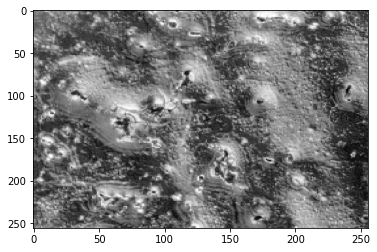

In [164]:
# Upload and display the images
uploaded = files.upload()
filename = list(uploaded.keys())[0];
image = np.loadtxt(filename)
showImage(image)

##Question 1

Write a program to show the minimum and the maximum pixel values of an 8 bits/pixel grayscale image. Also write a program to convert grayscale image to a binary image using threshold (Tth) operation where

$$Tth = \frac{min(pixel value) + max(pixel value)}{2}$$.

Mathematically, 

    G(x,y) = 0 if f(x,y) ≤ (minimum gray value + maximum gray value)/2
           = 1, otherwise

In [67]:
minPixelValue = image.max()
maxPixelValue = image.min()
threshold = (minPixelValue + maxPixelValue) / 2.0;

print("Minimum pixel value: " + str(minPixelValue))
print("Maximum pixel value: " + str(maxPixelValue))
print("Threshold          : " + str(threshold))

Minimum pixel value: 251.0
Maximum pixel value: 0.0
Threshold          : 125.5


In [68]:
# Grayscale to binary convertor function 

def gray2bin(pixelValue, threshold):
  if pixelValue <= threshold:
    return 0;
  else:
    return 1;


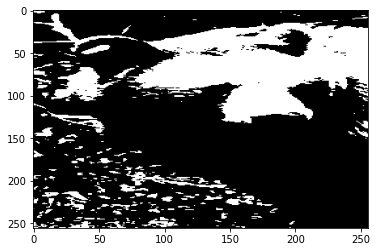

In [69]:
gray2bin_vec = np.vectorize(gray2bin)
binaryImage = gray2bin_vec(image, threshold)
showImage(binaryImage)

## Question 2

Write a program to implement down sampling of an image by a factor of 2. Apply the same effect for 2-3 successive times and comment on visual content. Finally, write a program to upscale the down sampled image through interpolation and comment on visual quality of the image.

###Downsampling Image

In [ ]:
DOWNSAMPLING_FACTOR = 2;

In [ ]:
showImage(image)
print("The original image")

In [ ]:
tempimage = measure.block_reduce(image, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled once")

In [ ]:
tempimage = measure.block_reduce(tempimage, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled twice")

In [ ]:
tempimage = measure.block_reduce(tempimage, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled thrice")

###Upsampled Image

In [ ]:
tempimage = cv2.resize(tempimage, image.shape, interpolation = cv2.INTER_LINEAR);
showImage(tempimage)

##Question 3

Write a program to implement image negation operation:
$S = L - 1 - R$ where,

 $L$ = maximum gray value <br>
 $R$ = pixel value of input image <br>
 $S$ = pixel value of output image


In [159]:
def negatePixel(r, l):
  return l-1-r;

241.0


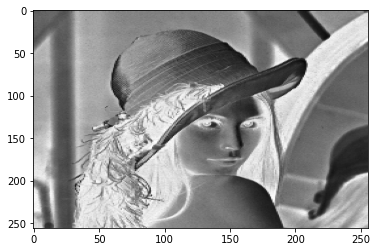

In [160]:
negatePixelVector = np.vectorize(negatePixel);
L = np.max(image)
print(L)
outputImage = negatePixelVector(image, L)
showImage(outputImage)

##Question 4

Write a program to implement change in dynamic range of an image from $[a, b]$ to $[c,d]$. Here $a$ and $c$ are the minimum pixel value of input and output image respectively and $b$ and $d$ are the maximum for the two. 

In [140]:
def rescalePixel(pixelValue, a, b, c, d):
  return (pixelValue-a) * (d-c)//(b-a)  + c;

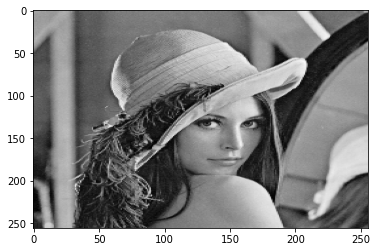

In [141]:
showImage(image)

Enter minimum pixel value for output image: 200
Enter maximum pixel value for output image: 205


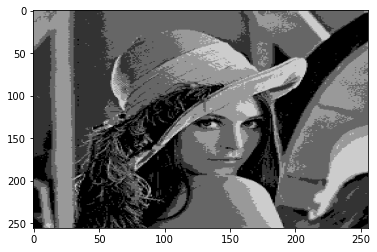

In [149]:
a = np.min(image)
b = np.max(image)

c = int(input("Enter minimum pixel value for output image: "));
d = int(input("Enter maximum pixel value for output image: "));

rescaleImage = np.vectorize(rescalePixel);
output = rescaleImage(image, a, b, c, d);
showImage(output)

## Question 5

Implement image negation operation using logical NOT operation and verify results with using linear transformation function in question 3

In [156]:
def bitcmp(pixel):
  return ~np.uint8(pixel);

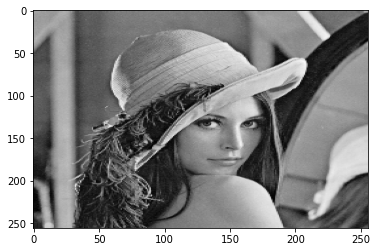

In [157]:
showImage(image)

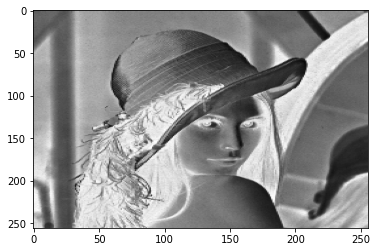

In [158]:
bitcmpImage = np.vectorize(bitcmp)
output = bitcmpImage(image);
showImage(output)

## Question 6

Write a program to develop histogram of an image and show it through display. The size of the image and pixel values is made flexible.

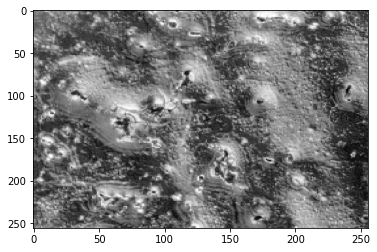

In [165]:
showImage(image)

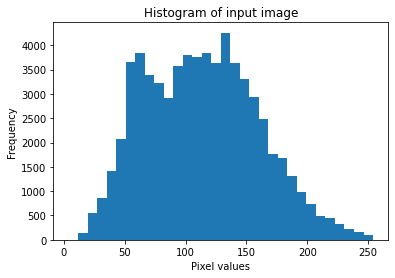

In [174]:
flattened_image = image.flatten()
plt.hist(flattened_image, bins=32)
plt.title("Histogram of input image")
plt.xlabel("Pixel values");
plt.ylabel("Frequency")
plt.show()

In [179]:
def setZero(pixel, mask):
  return np.uint8(pixel) & mask;

Setting lower order bits to 0


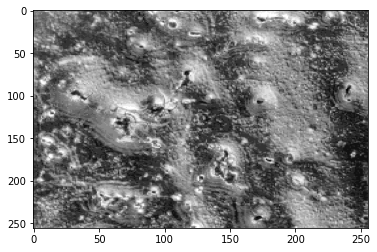

In [188]:
setZeroImage = np.vectorize(setZero);

print("Setting lower order bits to 0")
output_lower_zero = setZeroImage(image, 128+64+32+16);

showImage(output_lower_zero);

Setting higher order bits to 0


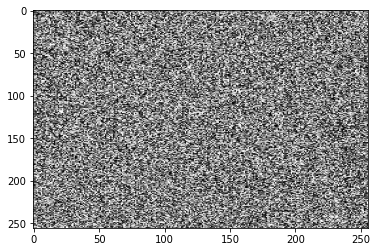

In [190]:
print("Setting higher order bits to 0")
output_higher_zero = setZeroImage(image, 8+4+2+1);

showImage(output_higher_zero);

## Question 7

Write a program to implement histogram equalization of an 8-bit/pixel gray scale image. Show that a second pass of histogram equalization will produce exactly the same result as the first pass.